I'm gonna overwrite a lot of this notebook's old content. I changed the way I'm calculating wt, and wanna test that my training worked. 

In [1]:
from pearce.emulator import OriginalRecipe, ExtraCrispy
from pearce.mocks import cat_dict
import numpy as np
from os import path

In [2]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
%%bash
ls ~/des/Pearce*.hdf5

/u/ki/swmclau2/des/PearceRedMagicWpCosmo.hdf5
/u/ki/swmclau2/des/PearceRedMagicWpCosmo2.hdf5
/u/ki/swmclau2/des/PearceRedMagicWpCosmoTest.hdf5
/u/ki/swmclau2/des/PearceRedMagicXiChinchilla.hdf5
/u/ki/swmclau2/des/PearceRedMagicXiCosmo.hdf5
/u/ki/swmclau2/des/PearceRedMagicXiCosmoTest.hdf5
/u/ki/swmclau2/des/PearceTrainerTest1.hdf5


In [4]:
training_file = '/u/ki/swmclau2/des/PearceRedMagicXiCosmo.hdf5'
test_file = '/u/ki/swmclau2/des/PearceRedMagicXiCosmoTest.hdf5'
em_method = 'gp'
split_method = 'random'

In [5]:
a = 1.0
z = 1.0/a - 1.0

In [6]:
fixed_params = {'z':z, 'r':24.06822623}

In [7]:
emu = OriginalRecipe(training_file, method = em_method, fixed_params=fixed_params, downsample_factor=1.0)#,
                    #hyperparams = {'n_estimators': 500,
                    #              'max_depth': 5})

/u/ki/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:265: UserWarning: WARNING: NaN detected. Skipped 12788 points in training data.
  warnings.warn('WARNING: NaN detected. Skipped %d points in training data.' % (num_skipped))


In [8]:
emu.get_param_names()

['ombh2',
 'omch2',
 'w0',
 'ns',
 'ln10As',
 'H0',
 'Neff',
 'logM0',
 'sigma_logM',
 'logMmin',
 'logM1',
 'alpha']

In [12]:
zhongzhu_dict = {'omch2':[0.2661017,1.8339794 ], 'ombh2':[0.1054246,10.6161248], 'ln10As':[1.1295944,2.2441632],\
                 'H0':[0.3643993,13.8155106],\
                'ns':[0.2408568,10.6371797], 'Neff':[11.5649985,11.3512804], 'w0':[5.6407612,7.342365 ],\
                 'logM0': [4.9071932,3.1795786,],\
                 'alpha':[10.6279446,3.7658774], 'logM1':[11.7621938,5.0188608], 'sigma_logM':[4.7031938, 4.6846614], 'logMmin':[1.0, 1.0],
                'amp':[-12.0550382, 0.0,-1.5383083], 'r':[0.0, 0.0]}

names = ['amp']
names.extend(emu.get_param_names())
from itertools import cycle
names = cycle(names)
amp_count = 0
v = []
for n in names:
    if n== 'amp':
        amp_count+=1
    #v.append(zhongzhu_dict[n][amp_count-1]) #this is a poison hack dont judge me
    v.append(zhongzhu_dict[n][amp_count]) #this is a poison hack dont judge me

    if amp_count==2:
        break
        
v = np.array(v)

In [13]:
emu._emulator.set_parameter_vector(v)

In [14]:
emu.scale_bin_centers

array([  0.09581734,   0.13534558,   0.19118072,   0.27004994,
         0.38145568,   0.53882047,   0.76110414,   1.07508818,
         1.51860241,   2.14508292,   3.03001016,   4.28000311,
         6.04566509,   8.53972892,  12.06268772,  17.0389993 ,
        24.06822623,  33.99727318])

In [15]:
emu.n_bins

1

In [16]:
#print emu.x.shape
#print emu.downsample_x.shape
if hasattr(emu, "_emulators"):
    print emu._emulators[0]._x.shape
else:
    print emu._emulator._x.shape

(27212, 12)


In [17]:
emu._ordered_params

OrderedDict([('ombh2', (0.02066455, 0.02371239)),
             ('omch2', (0.10121810000000001, 0.13177679999999997)),
             ('w0', (-1.399921, -0.56584860000000003)),
             ('ns', (0.92784619999999995, 0.99744959999999994)),
             ('ln10As', (3.0009000000000001, 3.179424)),
             ('H0', (61.694719999999997, 74.76751999999999)),
             ('Neff', (2.6212499999999999, 4.2787499999999996)),
             ('logM0', (13.1, 16.100000000000001)),
             ('sigma_logM', (0.050000000000000003, 0.29999999999999999)),
             ('logMmin', (13.1, 14.1)),
             ('logM1', (13.1, 15.1)),
             ('alpha', (0.80000000000000004, 1.2))])

In [18]:
gof = emu.goodness_of_fit(training_file, statistic = 'log_frac')
print gof.mean()

0.000317065756859


In [19]:
gof = emu.goodness_of_fit(training_file, statistic = 'frac')
print gof.mean()

1.89590010712e-05


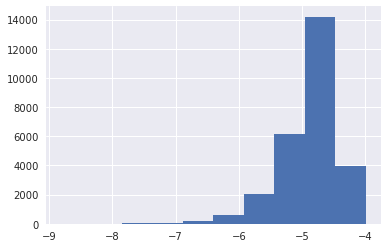

In [ ]:
plt.hist(np.log10(gof) );

In [ ]:
model = emu._emulator
ypred = model.predict(emu.y, emu.x, False, False, False)*emu._y_std+emu._y_mean

In [ ]:
resids = np.abs(emu.y*emu._y_std+emu._y_mean - ypred)

In [ ]:
np.mean(resids/(emu.y*emu._y_std+emu._y_mean))

In [ ]:
ypred.mean(), emu._y_mean

In [ ]:
test_gof = emu.goodness_of_fit(test_file, statistic = 'log_frac')
print test_gof.mean()

In [ ]:
test_gof = emu.goodness_of_fit(test_file, statistic = 'frac')
print test_gof.mean()

In [ ]:
plt.hist(np.log10(test_gof));

In [ ]:
test_x, test_y, test_yerr, _ = emu.get_data(test_file,fixed_params, None)

In [ ]:
test_x

In [ ]:
(emu.x*emu._x_std) + emu._x_mean

In [ ]:
emu.get_param_names()

In [ ]:
test_x_white, test_y_white = (test_x - emu._x_mean)/(emu._x_std + 1e-5), (test_y - emu._y_mean)/(emu._y_std + 1e-5)

In [ ]:
model = emu._emulator

In [ ]:
pred_y_white = model.predict(emu.y, test_x_white, False, False, False)

In [ ]:
pred_y = pred_y_white*emu._y_std + emu._y_mean

In [ ]:
plt.plot(pred_y[:100], label = 'pred')
plt.plot(test_y[:100], label = 'truth')

plt.legend(loc = 'best')

In [ ]:
test_y.mean(), emu._y_mean, pred_y.mean()

In [ ]:
test_y.std(), emu._y_std, pred_y.std()

In [ ]:
plt.hist(pred_y_white, bins = np.linspace(-3, 3, 100), label = 'Pred')
plt.hist(test_y_white, bins = np.linspace(-3, 3, 100), label = 'Test', alpha = 0.4);
plt.legend(loc = 'best')